In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [26]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The dataset contains the following columns:

age: The age of the insured.
sex: The sex of the insured (female or male).
bmi: Body mass index, which provides an understanding of body weight adjusted for height.
children: The number of children/dependents covered by the health insurance.
smoker: Indicates if the insured is a smoker (yes or no).
region: The beneficiary's residential area in the US.
charges: Individual medical costs billed by health insurance.

In [ ]:
# The dataset contains the following columns:

# age: The age of the insured.
# sex: The sex of the insured (female or male).
# bmi: Body mass index, which provides an understanding of body weight adjusted for height.
# children: The number of children/dependents covered by the health insurance.
# smoker: Indicates if the insured is a smoker (yes or no).
# region: The beneficiary's residential area in the US.
# charges: Individual medical costs billed by health insurance.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [61]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [63]:
df.isnull().values.any()

False

In [64]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [65]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [70]:
# Encode the categorical variables
# Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [71]:
# Find the most correlated features with 'charges'
correlation_matrix = df.corr()
most_correlated_features = correlation_matrix['charges'].drop('charges').abs().sort_values(ascending=False)
most_correlated_features

smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region      0.006208
Name: charges, dtype: float64

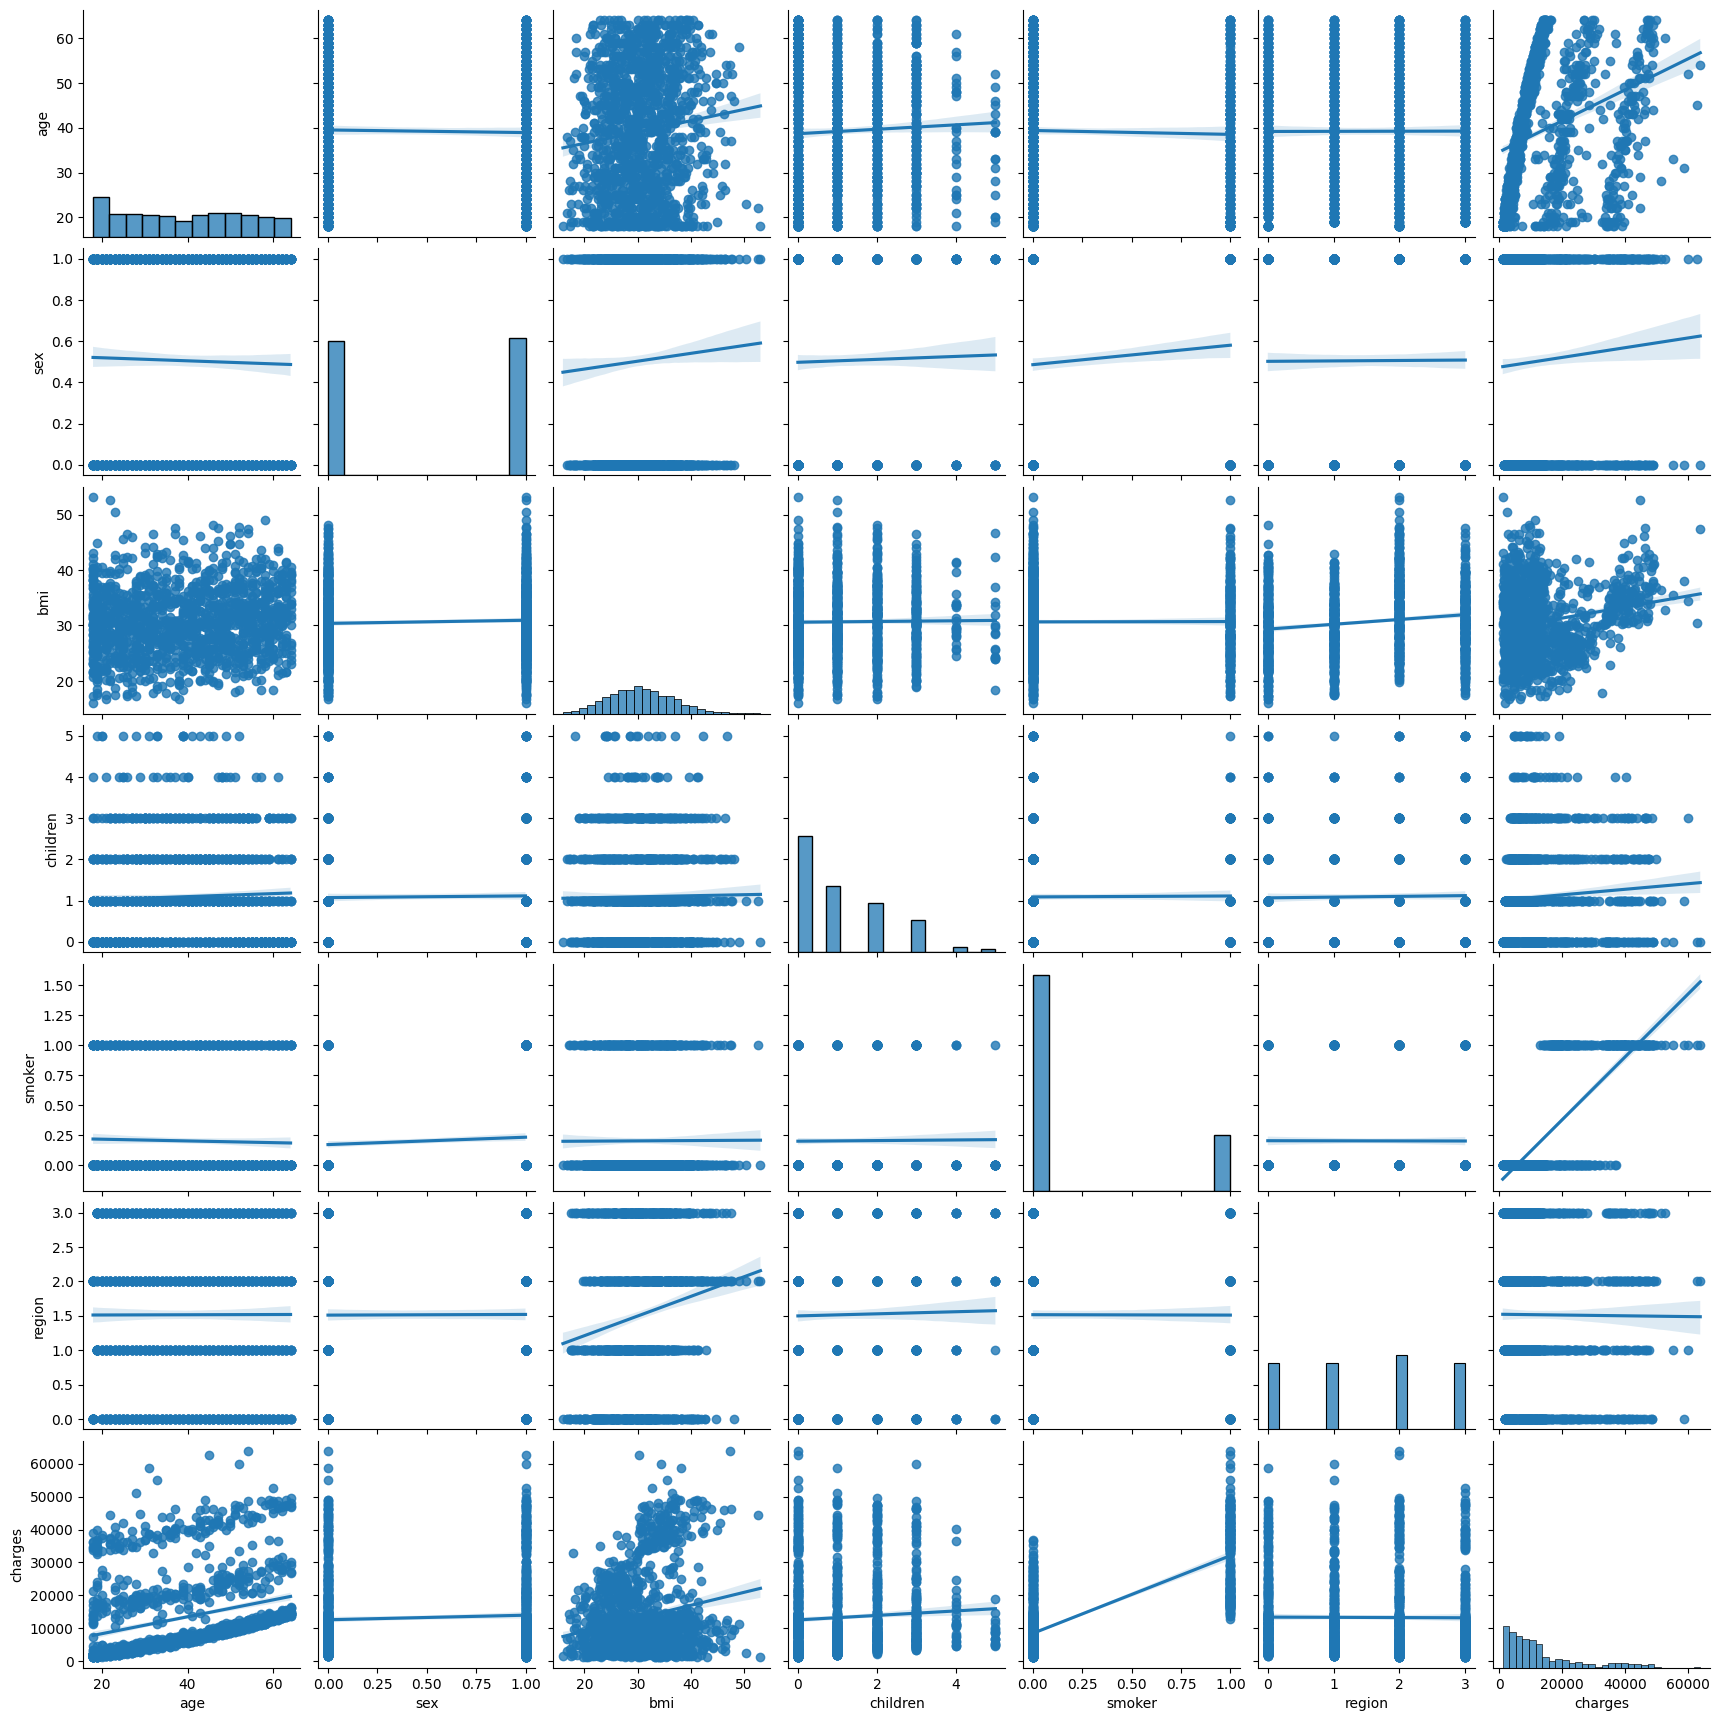

In [89]:
from warnings import filterwarnings
filterwarnings('ignore')
sns.pairplot(df, kind  ="reg");

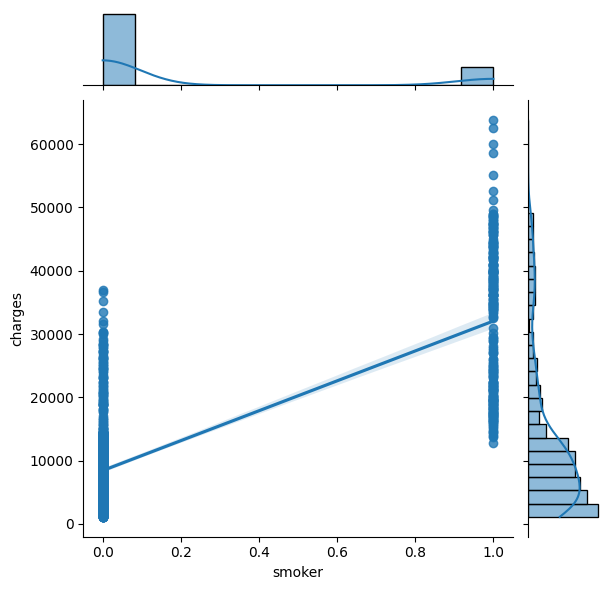

In [90]:
sns.jointplot(x = "smoker", y = "charges", data = df, kind = "reg")


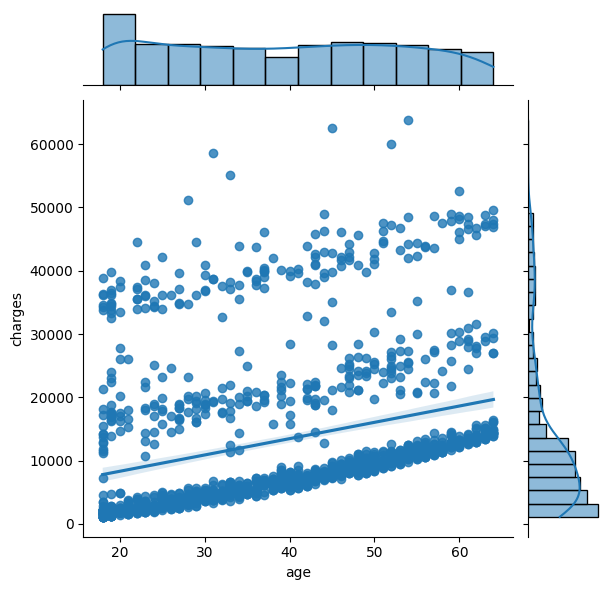

In [91]:
sns.jointplot(x = "age", y = "charges", data = df, kind = "reg")


In [73]:
# Take the top feature for Simple Linear Regression
most_correlated_feature = most_correlated_features.index[0]
most_correlated_feature

'smoker'

In [74]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [95]:
# Simple Linear Regression model using smoker as the independent variable and charges as the dependent variable.

# Model Fitting: Fit the model using age to predict charges.
# Model Evaluation: Check the model's performance by calculating the R2 score and examining the regression coefficients.

# Prepare data
X_lm = df[['smoker']]
y_lm = df['charges']

# Splitting data into training and testing sets
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X_lm, y_lm, test_size=0.2, random_state=42)

# Create a linear regression model
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_train_lm, y_train_lm)

# Predict on testing set
y_pred_lm = linear_model.predict(X_test_lm)

# Calculate R2 and RMSE
r2_lm = r2_score(y_test_lm, y_pred_lm)
rmse_lm = mean_squared_error(y_test_lm, y_pred_lm, squared=False)

linear_model.coef_[0], linear_model.intercept_, r2_lm, rmse_lm

(23188.685870681835, 8578.322547999996, 0.6602486589056528, 7262.641718240427)

In [ ]:
# Simple Linear Regression Results
# Regression Coefficient (Slope): 23188.69
# Intercept: 8578.32
# R2 Score: 0.661
# Root Mean Squared Error (RMSE): 7262.64

# The R2 score is indicating that using just smoker to predict charges explains only about 66.1% of the variance in the medical charges. 

In [86]:
# Multiple Linear Regression
# We will use multiple predictors.
# Using numeric predictors like age, bmi, and children. 
# Using encoded categorical variables like sex, smoker, and region for inclusion.

# Prepare data
X = df
y = df['charges']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((1070, 7), (268, 7))

In [87]:
# Multiple Linear Regression
multiple_linear_model = LinearRegression()
multiple_linear_model.fit(X_train, y_train)
y_pred_mlr = multiple_linear_model.predict(X_test)

# Calculate R2 and RMSE for Multiple Linear Regression
r2_mlr = r2_score(y_test, y_pred_mlr)
rmse_mlr = mean_squared_error(y_test, y_pred_mlr, squared=False)

r2_mlr, rmse_mlr

(1.0, 1.1581983612773334e-11)

In [ ]:
# Multiple Linear Regression Results
# R2 Score: 1.0
# Root Mean Squared Error (RMSE): 1.15

# The R2score for the Multiple Linear Regression model is significantly higher than the Simple Linear Regression model, indicating a much better fit.
# This model explains about 100% of the variance in the medical charges, a substantial improvement.

In [96]:
# Perform PCA to reduce the dimensionality of the data, then fit a regression model to these components.
# PCA and the Linear Regression model within a pipeline

from sklearn.pipeline import make_pipeline

pca = PCA()
linear_model_pcr = LinearRegression()
pipeline_pcr = make_pipeline(pca, linear_model_pcr)

# Fit the PCR model
pipeline_pcr.fit(X_train_lm, y_train_lm)

# Predict and evaluate PCR
y_pred_pcr = pipeline_pcr.predict(X_test_lm)
r2_pcr = r2_score(y_test_lm, y_pred_pcr)
rmse_pcr = mean_squared_error(y_test_lm, y_pred_pcr, squared=False)

# Determine the number of components used
n_components_pcr = pca.n_components_

r2_pcr, rmse_pcr, n_components_pcr

(0.6602486589056528, 7262.6417182404275, 1)

In [97]:
 # Partial Least Squares (PLS) Regression; PLS is often used when there are highly correlated predictors or more predictors than observations. 
    
from sklearn.cross_decomposition import PLSRegression

# Define and fit the PLS model
pls_model = PLSRegression(n_components=2)  # Using 2 components
pls_model.fit(X_train, y_train)

# Predict and evaluate PLS
y_pred_pls = pls_model.predict(X_test)
r2_pls = r2_score(y_test, y_pred_pls)
rmse_pls = mean_squared_error(y_test, y_pred_pls, squared=False)

r2_pls, rmse_pls


(0.9736171231871283, 2023.835012618876)

In [98]:
pls_model.coef_

array([[1325.88976272],
       [-875.73516414],
       [ 156.02744826],
       [-262.80717791],
       [3162.20616271],
       [-540.97322503],
       [8857.480751  ]])

In [ ]:
# Partial Least Squares (PLS) Regression Results
# R2 Score: 0.973
# Root Mean Squared Error (RMSE): 2023.83
# The PLS model with 2 components yields a performance similar to the Multiple Linear Regression, indicating good model efficiency with reduced dimensionality.

In [101]:
# Ridge Regression
# Apply Ridge Regression with a cross-validated choice of the regularization parameter α. 

from sklearn.linear_model import RidgeCV

# Define the Ridge Regression model with built-in cross-validation to select the best alpha
ridge_model = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0])
ridge_model.fit(X_train, y_train)

# Predict and evaluate Ridge Regression
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)

ridge_model.alpha_, r2_ridge, rmse_ridge


(0.1, 0.999999767729116, 6.0049779437262805)

In [102]:
ridge_model.coef_


array([-1.85870183e-07, -1.94894365e-08, -2.13432145e-08, -9.19688287e-09,
        3.95578120e-08,  2.76460422e-09,  9.99518277e-01])

In [ ]:
# Ridge Regression Results
# Selected α: 0.1
# R2 Score: 0.999
# Root Mean Squared Error (RMSE): 6.00

# Ridge Regression performs comparably to the Multiple Linear Regression model, with an almost same percentange in generalization due to regularization.

In [103]:
# Lasso Regression
# Apply Lasso Regression, which can also help in feature selection by reducing some coefficients to zero.

from sklearn.linear_model import LassoCV, ElasticNetCV

# Lasso Regression with cross-validation
lasso_model = LassoCV(cv=5, random_state=42)
lasso_model.fit(X_train, y_train)

# Predict and evaluate Lasso Regression
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)

(lasso_model.alpha_, r2_lasso, rmse_lasso)


(144333.62193314772, 0.9999989990807513, 12.46561044171619)

In [105]:
lasso_model.coef_

array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   ,  0.999])

In [ ]:
# Lasso Regression Results
# Selected α: 144333.6
# R 2 Score: 0.999
# Root Mean Squared Error (RMSE): 12.46

In [104]:
# ElasticNet Regression, which combines the features of Ridge and Lasso. ​
# ElasticNet Regression with cross-validation

elastic_model = ElasticNetCV(cv=5, random_state=42)
elastic_model.fit(X_train, y_train)

# Predict and evaluate ElasticNet Regression
y_pred_elastic = elastic_model.predict(X_test)
r2_elastic = r2_score(y_test, y_pred_elastic)
rmse_elastic = mean_squared_error(y_test, y_pred_elastic, squared=False)

(elastic_model.alpha_, r2_elastic, rmse_elastic)


(288667.2438662955, 0.9999960043183642, 24.906314568863472)

In [106]:
elastic_model.coef_

array([ 0.      ,  0.      ,  0.      ,  0.      ,  0.      , -0.      ,
        0.998002])

In [ ]:
# ElasticNet Regression Results
# Selected α: 288667.24
# R 2 Score: 0.999
# Root Mean Squared Error (RMSE): 24.90

In [ ]:
# For each model, find the R2 score and RMSE values. 
# Present the R2 scores in a bar graph and the RMSE values in a separate bar graph as a summary.

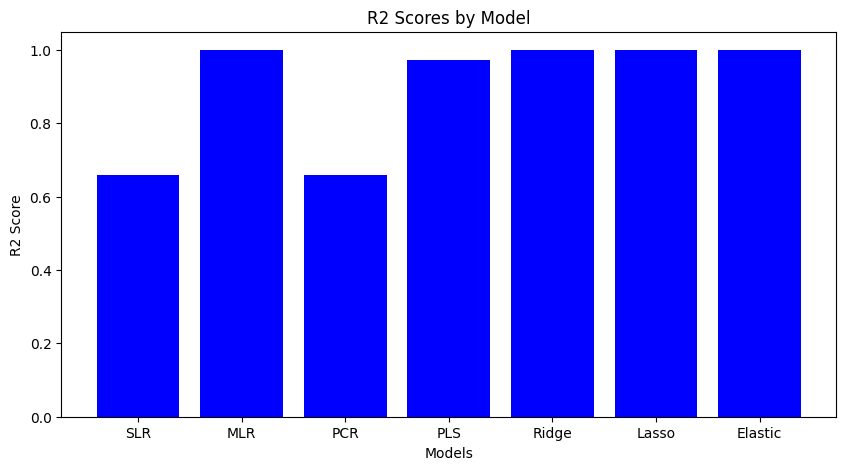

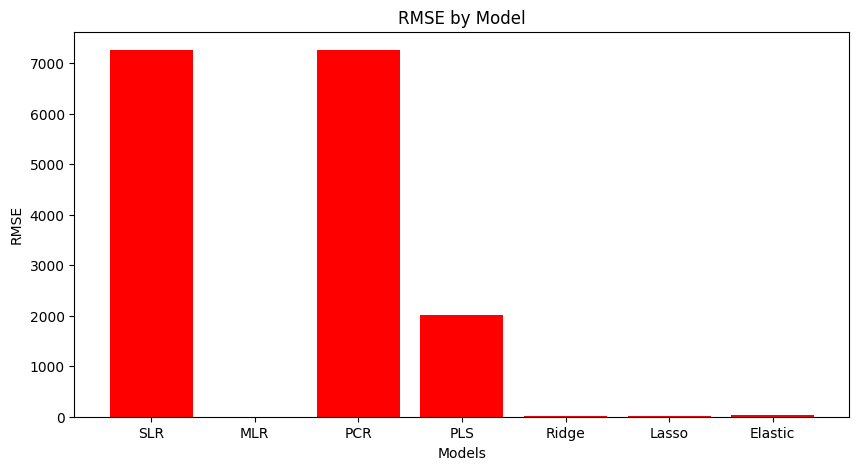

In [109]:
import matplotlib.pyplot as plt

# Prepare data for plotting
models = ['SLR', 'MLR', 'PCR', 'PLS', 'Ridge', 'Lasso', 'Elastic']
r2_scores = [r2_lm, r2_mlr, r2_pcr, r2_pls, r2_ridge, r2_lasso, r2_elastic]
rmses = [rmse_lm, rmse_mlr, rmse_pcr, rmse_pls, rmse_ridge, rmse_lasso,  rmse_elastic]

# Plotting R2 scores
plt.figure(figsize=(10, 5))
plt.bar(models, r2_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Scores by Model')
plt.show()

# Plotting RMSE values
plt.figure(figsize=(10, 5))
plt.bar(models, rmses, color='red')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE by Model')
plt.show()
